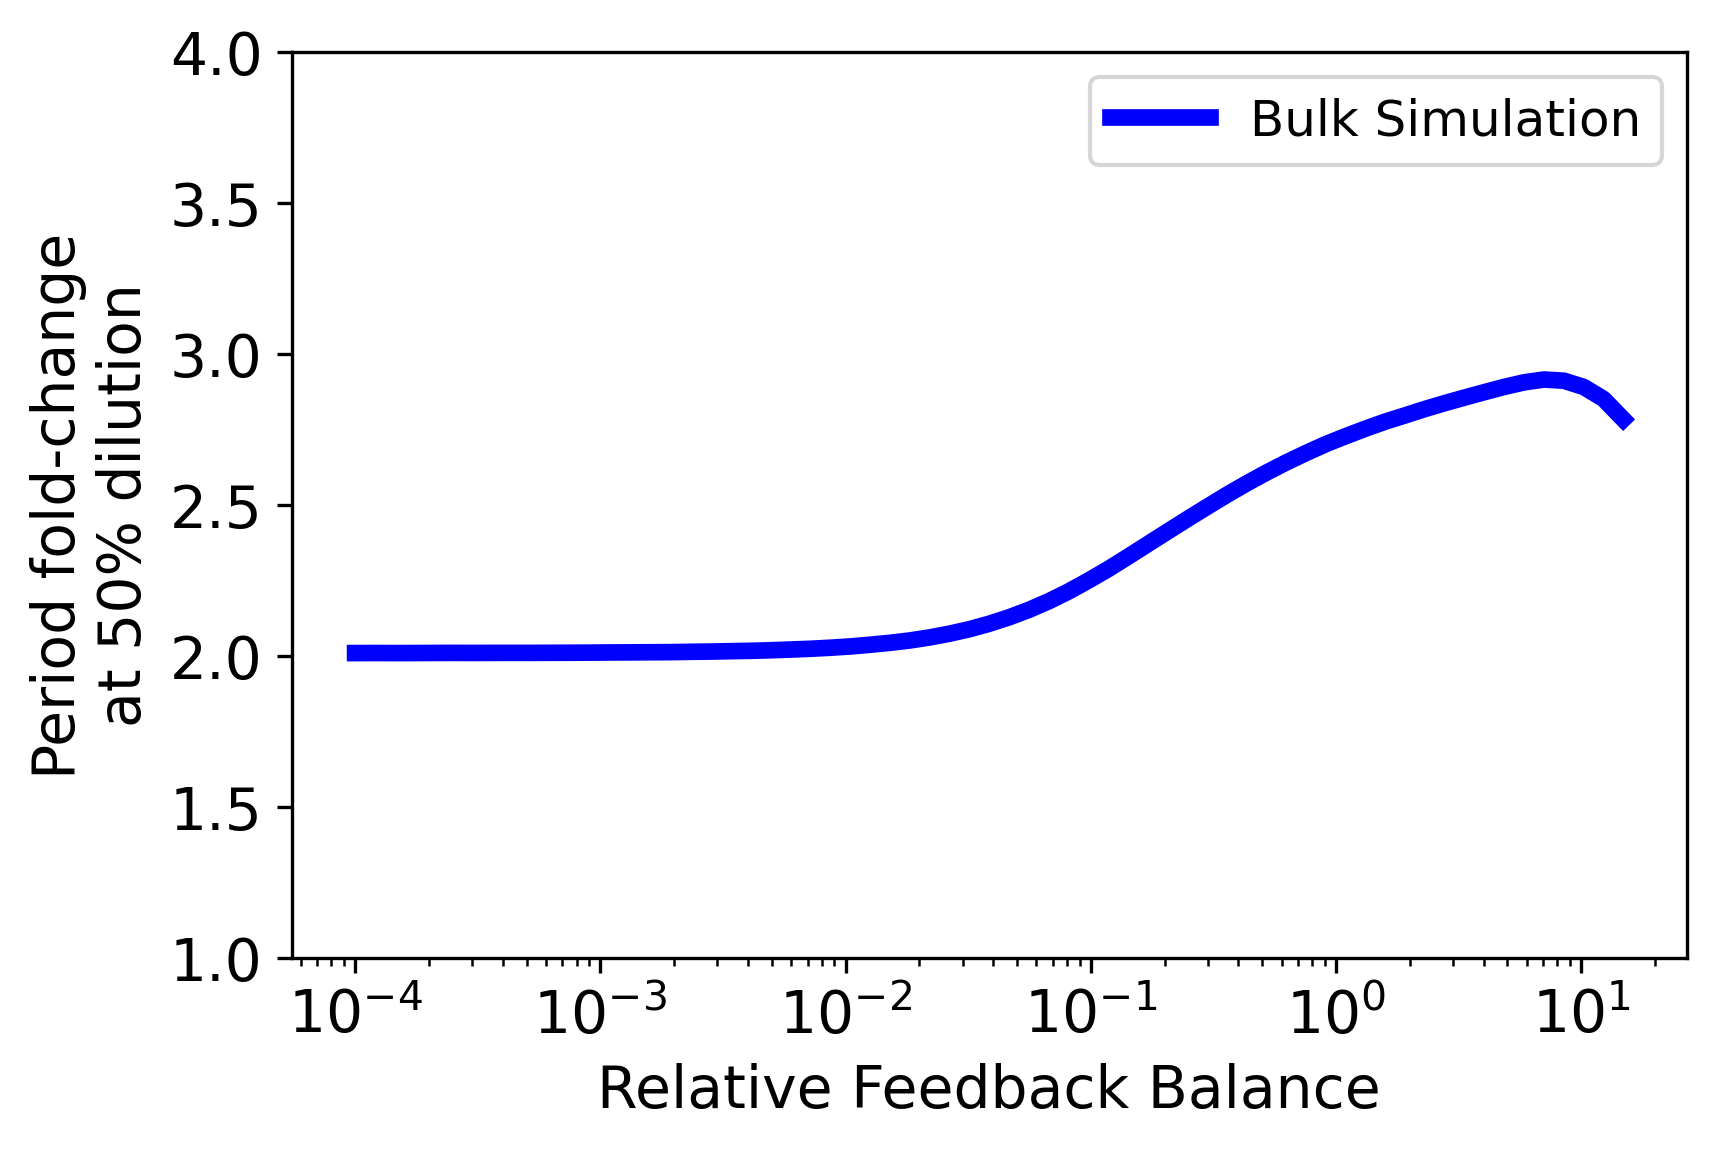

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_path = '../feedback_balance/period_robustness.npz'
data = np.load(data_path)
periods_1 = [p[0] for p in data['periods']]
amplitudes_1 = [p[0] for p in data['amplitudes']]
periods_05 = [p[1] for p in data['periods']]
amplitudes_05 = [p[1] for p in data['amplitudes']]

# Filter out small amplitude oscillations at d = 0.5
pa = list(zip(amplitudes_05, periods_05, periods_1))
period_fold_change = [t[1]/t[2] if t[0] > 0.1 else np.NaN for t in pa]
fig = plt.figure()
fig.figsize = (8.0, 6.0)
fig.dpi = 300
fig.facecolor = 'white'
ax = plt.gca()
ax.plot(data['r_values'], period_fold_change, '-', linewidth=4,
        color='blue', label='Bulk Simulation')
ax.set_xscale('log')
ax.set_ylim([1,4])
ax.tick_params(labelsize=14)
ax.set_xlabel('Relative Feedback Balance', fontsize=14)
ax.set_ylabel('Period fold-change\nat 50% dilution', fontsize=14)
plt.legend(fontsize=12)
plt.savefig('./PNGs/Period_Robustness_r.png', format='png', dpi=300, bbox_inches='tight')
plt.savefig('./SVGs/Period_Robustness_r.svg', format='svg', dpi=300, bbox_inches='tight')
plt.show()
